##PyCaret Clustering
PyCaret is an open-source, low-code Python library that automates machine learning workflows, significantly speeding up experiments and boosting productivity. It simplifies complex processes by replacing extensive code with concise commands. PyCaret integrates with various machine learning libraries and frameworks, making it accessible for both experienced and novice data scientists.

#  Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 75.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. Thi

## To start with
PyCaret's Clustering Module is an unsupervised machine learning module that performs the task of grouping a set of objects in such a way that objects in the same group (also known as a cluster) are more similar to each other than to those in other groups.

It provides several pre-processing features that prepare the data for modeling through the setup function. It has over 10 ready-to-use algorithms and several plots to analyze the performance of trained models.

A typical workflow in PyCaret's unsupervised module consist of following 6 steps in this order:

### **Setup** ➡️ **Create Model** ➡️ **Assign Labels** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

In [ ]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data

In [ ]:
# Get the 'energy' dataset
credit_data = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [ ]:
# Print some info
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  24000 non-null  int64  
 1   SEX        24000 non-null  int64  
 2   EDUCATION  24000 non-null  int64  
 3   MARRIAGE   24000 non-null  int64  
 4   AGE        24000 non-null  int64  
 5   PAY_1      24000 non-null  int64  
 6   PAY_2      24000 non-null  int64  
 7   PAY_3      24000 non-null  int64  
 8   PAY_4      24000 non-null  int64  
 9   PAY_5      24000 non-null  int64  
 10  PAY_6      24000 non-null  int64  
 11  BILL_AMT1  24000 non-null  float64
 12  BILL_AMT2  24000 non-null  float64
 13  BILL_AMT3  24000 non-null  float64
 14  BILL_AMT4  24000 non-null  float64
 15  BILL_AMT5  24000 non-null  float64
 16  BILL_AMT6  24000 non-null  float64
 17  PAY_AMT1   24000 non-null  float64
 18  PAY_AMT2   24000 non-null  float64
 19  PAY_AMT3   24000 non-null  float64
 20  PAY_AM

## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [ ]:
# import pycaret clustering and init setup
from pycaret.clustering import *

# Initialize PyCaret setup with the correct dataset and target variable
s = setup(credit_data, session_id=113)


,Description,Value
0,Session id,113
1,Original data shape,"(24000, 24)"
2,Transformed data shape,"(24000, 24)"
3,Numeric features,24
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


After successful execution of the setup, an information grid is displayed with:

* Session id: Seed for reproducibility; auto-generated if not provided.
* Target type: Automatically detected as Binary, Multiclass, or Regression.
* Original data shape: Dimensions of the untransformed data.
* Transformed train set shape: Dimensions of the training data after transformations.
* Transformed test set shape: Dimensions of the test data after transformations.
* Numeric features: Count of numerical features.
Categorical features: Count of categorical features.







PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [ ]:
# import ClassificationExperiment and init the class
from pycaret.clustering import ClusteringExperiment
experiment = ClusteringExperiment()

In [ ]:
# check the type of exp
type(experiment)

pycaret.clustering.oop.ClusteringExperiment

In [ ]:
# init setup on exp
experiment.setup(credit_data, session_id = 113)

,Description,Value
0,Session id,113
1,Original data shape,"(24000, 24)"
2,Transformed data shape,"(24000, 24)"
3,Numeric features,24
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


We can use either the Functional or OOP method, and switch between them as needed. Both methods will yield consistent results, and their outputs have been tested for reliability.

## Create Model

This function trains and evaluates the performance of a given model. Metrics evaluated can be accessed using the `get_metrics` function. Custom metrics can be added or removed using the `add_metric` and `remove_metric` function. All the available models can be accessed using the `models` function.

In [ ]:
# train kmeans model
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4629,17693.4304,0.8581,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# to check all the available models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [ ]:
# train kmean model
meanshift = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4629,17693.4304,0.8581,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

## Assign Model
This function assigns cluster labels to the training data, given a trained model.

In [ ]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Cluster
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,Cluster 1
1,90000,2,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,Cluster 1
2,50000,2,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,Cluster 1
3,50000,1,2,1,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,Cluster 1
4,50000,1,1,2,37,0,0,0,0,0,...,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,80000,1,2,2,34,2,2,2,2,2,...,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1,Cluster 1
23996,150000,1,3,2,43,-1,-1,-1,-1,0,...,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,Cluster 1
23997,30000,1,2,2,37,4,3,2,-1,0,...,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,Cluster 1
23998,80000,1,3,1,41,1,-1,0,0,0,...,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,Cluster 1


## Analyze Model
we can use the plot_model function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases, but here we aldredy have the trained model's.

In [ ]:
from pycaret.clustering import create_model

kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Cluster
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,Cluster 1
1,90000,2,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,Cluster 1
2,50000,2,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,Cluster 1
3,50000,1,2,1,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,Cluster 1
4,50000,1,1,2,37,0,0,0,0,0,...,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,80000,1,2,2,34,2,2,2,2,2,...,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1,Cluster 1
23996,150000,1,3,2,43,-1,-1,-1,-1,0,...,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,Cluster 1
23997,30000,1,2,2,37,4,3,2,-1,0,...,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,Cluster 1
23998,80000,1,3,1,41,1,-1,0,0,0,...,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,Cluster 1


In [ ]:
from pycaret.clustering import *

In [ ]:
# plot confusion matrix :
plot_model(kmeans, plot = 'cluster')

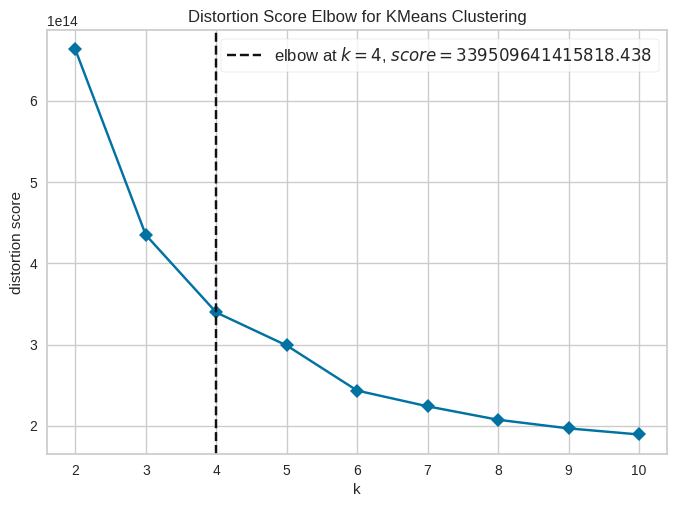

In [ ]:
# plot elbow
plot_model(kmeans, plot = 'elbow')

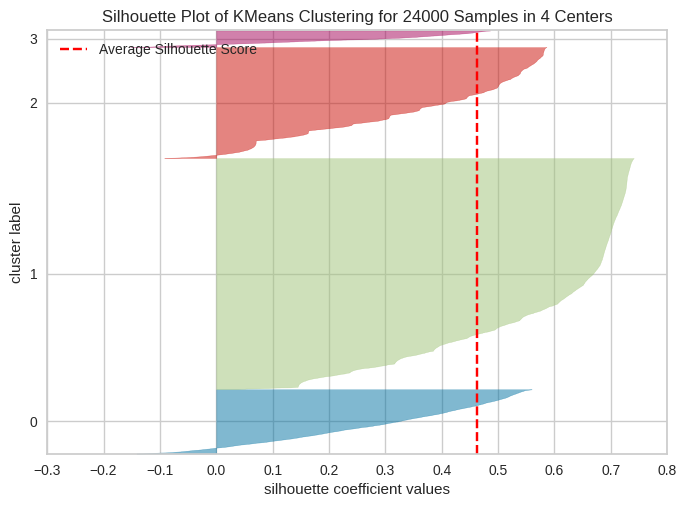

In [ ]:
# plot silhouette
plot_model(kmeans, plot = 'silhouette')

An alternative to the plot_model function is evaluate_model, which can only be used in a notebook environment as it relies on ipywidgets.

In [ ]:
##The evaluate_model function displays interactive visualizations of various performance metrics for the best-performing model in a notebook environment.
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Prediction
The `predict_model` function returns `Cluster` label as a new column in the input dataframe. This step may or may not be needed depending on the use-case. Some times clustering models are trained for analysis purpose only and the interest of user is only in assigned labels on the training dataset, that can be done using `assign_model` function. `predict_model` is only useful when you want to obtain cluster labels on unseen data (i.e. data that was not used during training the model).

In [ ]:
# predict on test set
kmeans_pred = predict_model(kmeans, data=credit_data)
kmeans_pred

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Cluster
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0,Cluster 1
1,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,Cluster 1
2,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,Cluster 1
3,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0,Cluster 1
4,50000.0,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,...,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,80000.0,1.0,2.0,2.0,34.0,2.0,2.0,2.0,2.0,2.0,...,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1.0,Cluster 1
23996,150000.0,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0,Cluster 1
23997,30000.0,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0,Cluster 1
23998,80000.0,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0,Cluster 1


## Save Model
At last, we can save the entire pipeline on disk for later use, using pycaret's save_model function.

In [ ]:
# save pipeline
save_model(kmeans, 'kmean_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                              'MARRIAGE', 'AGE', 'PAY_1',
                                              'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                              'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                              'BILL_AMT3', 'BILL_AMT4',
                                              'BILL_AMT5', 'BILL_AMT6',
                                              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                              'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                                              'default'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_fre

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('kmean_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                             'MARRIAGE', 'AGE', 'PAY_1',
                                             'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                             'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                             'BILL_AMT3', 'BILL_AMT4',
                                             'BILL_AMT5', 'BILL_AMT6',
                                             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                             'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                                             'default'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model', KMeans(n_clusters=4, random_state=113))])